In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/train.csv (1)/train.csv')
dataset.fillna(dataset.mean(axis=0), inplace=True)
dataset.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,...,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.59025,-0.117558,0.558392,0.405572,8.0,0.430972,75751,0.2254,11.0,4.744703,-0.572244,0.49,5.0,1.842984,27.053679,1.0,-0.549725,0.803059,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,4.886832e-07,-0.000156,...,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,3.59025,-0.117558,0.558392,0.405572,3.0,0.388896,17369,0.0166,13.0,4.744703,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-9.027256e-06,-0.000248,...,-0.000104,0.000555,0.000259,2.559339e-05,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.881545e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,3.59025,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.605593,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,-0.001031,0.000647,-9.295448e-04,-0.000543,...,-0.000003,-0.000102,-0.000292,5.032658e-04,-0.000126,-0.000135,0.000238,-0.000106,-0.000137,-0.000419,-0.000379,0.000013,0.000001,-0.000009,-0.000283,-0.000526,0.000247,-0.000134,0.000675,1.136847e-04,0.000234,-0.000506,-0.000007,-0.000249,0.000119,0.000277,0.000656,0.000127,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,3.59025,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.588524,1.801865,1.0,-1.131213,1.565036,-1.205438,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329675,0.000984,0.014106,0.000277,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,0.000340,-0.000639,0.000420,1.449000e-04,-0.000130,...,0.000120,-0.000119,0.000285,-1.020028e-07,0.000285,-0.000350,0.000214,-0.000703,0.000153,-0.000286,0.000136,-0.000579,-0.000139,-0.000005,-0.000009,0.000010,0.000290,-0.000068,-0.000352,2.739541e-04,-0.000292,0.000446,0.000288,0.000001,0.000304,-0.000027,0.000371,-0.000055,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.00000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,0.000005,0.001226,0.001213,-2.428211e-0

In [0]:
X = dataset.iloc[:,0:27]
Y = dataset.iloc[:,85]

In [0]:
X.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo
0,1,3.59025,-0.117558,0.558392,0.405572,8.0,0.430972,75751,0.2254,11.0,4.744703,-0.572244,0.49,5.0,1.842984,27.053679,1.0,-0.549725,0.803059,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675,0.055275
1,2,3.59025,-0.117558,0.558392,0.405572,3.0,0.388896,17369,0.0166,13.0,4.744703,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748
2,3,3.59025,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.605593,0.389061,1.728096,-1.798090,-1.019370,0.003077
3,4,3.59025,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.588524,1.801865,1.0,-1.131213,1.565036,-1.205438,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329675,0.000984
4,5,6.00000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224


In [0]:
X.shape

(40000, 27)

In [0]:
Y.head()

0   -0.001152
1   -0.000180
2   -0.000284
3   -0.000076
4    0.000020
Name: Ret_59, dtype: float64

In [0]:
Y.shape

(40000,)

In [0]:
scaler_x= MinMaxScaler()
scaler_x.fit(X)
xscale= scaler_x.transform(X)

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=27, kernel_initializer= 'normal'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss= 'mse', optimizer = 'adam' , metrics=['mse', 'mae'])
history = model.fit(xscale, Y, epochs= 10, batch_size = 50)





Epoch 1/10





40000/40000 [==============================] - 3s 86us/step - loss: 2.1064e-04 - mean_squared_error: 2.1064e-04 - mean_absolute_error: 0.0032
Epoch 2/10
40000/40000 [==============================] - 2s 55us/step - loss: 1.0758e-06 - mean_squared_error: 1.0758e-06 - mean_absolute_error: 5.4389e-04
Epoch 3/10
40000/40000 [==============================] - 2s 55us/step - loss: 9.5066e-07 - mean_squared_error: 9.5066e-07 - mean_absolute_error: 5.3770e-04
Epoch 4/10
40000/40000 [==============================] - 2s 56us/step - loss: 9.2967e-07 - mean_squared_error: 9.2967e-07 - mean_absolute_error: 5.3885e-04
Epoch 5/10
40000/40000 [==============================] - 2s 54us/step - loss: 9.2065e-07 - mean_squared_error: 9.2065e-07 - mean_absolute_error: 5.4006e-04
Epoch 6/10
40000/40000 [==============================] - 2s 56us/step - loss: 9.2663e-07 - mean_squared_error: 9.2663e-07 - mean_absolute_error: 5.5011e-04
Epoch 7/10
40000/40000 [=============================

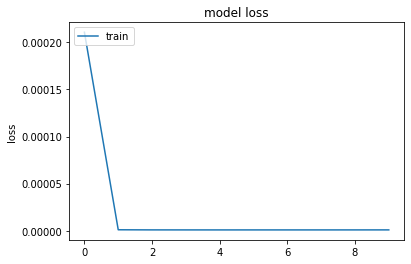

In [0]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
dataset2 = pd.read_csv('/content/drive/My Drive/test_2.csv (1)/test_2.csv')
dataset2.fillna(dataset.mean(axis=0), inplace=True)

In [0]:
Xnew = dataset2.iloc[:,0:27]
ynew = dataset2.iloc[:,85]
scaler_x= MinMaxScaler()
scaler_x.fit(Xnew)
xscale= scaler_x.transform(Xnew)
Ynew= model.predict(xscale)
Xnew.shape

(120000, 27)

In [0]:
xscale

array([[0.00000000e+00, 0.00000000e+00, 6.37679216e-01, ...,
        7.76498076e-01, 2.66853667e-01, 3.74114514e-01],
       [8.33340278e-06, 2.87805526e-01, 4.41045699e-01, ...,
        7.06841965e-01, 2.19751948e-01, 3.94085514e-01],
       [1.66668056e-05, 2.87805526e-01, 3.78082324e-01, ...,
        6.81707487e-01, 2.84476202e-01, 3.55670510e-01],
       ...,
       [9.99983333e-01, 0.00000000e+00, 3.16686851e-01, ...,
        7.06350557e-01, 1.73185272e-01, 3.67497322e-01],
       [9.99991667e-01, 2.22222222e-01, 3.43971157e-01, ...,
        6.62439054e-01, 2.03006283e-01, 3.76906353e-01],
       [1.00000000e+00, 2.87805526e-01, 4.41045699e-01, ...,
        6.47546041e-01, 2.91929295e-01, 3.85755556e-01]])

In [0]:
xscale.shape

(120000, 27)

In [0]:
Ynew

array([[-4.0185423e-06],
       [-4.0185423e-06],
       [-4.0185423e-06],
       ...,
       [-4.0185423e-06],
       [-4.0185423e-06],
       [-4.0185423e-06]], dtype=float32)

In [0]:
Ynew.shape

(120000, 1)

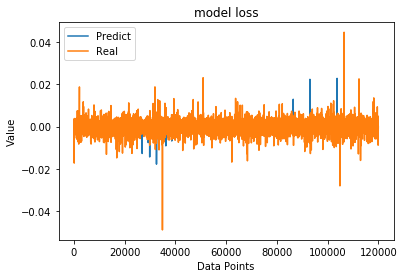

array([[-4.0185423e-06],
       [-4.0185423e-06],
       [-4.0185423e-06],
       ...,
       [-4.0185423e-06],
       [-4.0185423e-06],
       [-4.0185423e-06]], dtype=float32)

In [0]:
plt.plot(Ynew)
plt.plot(ynew)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predict', 'Real'], loc='upper left')
plt.show()
Ynew

In [0]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [0]:
n_folds = 5
def rmsle_cv(model):
  rmse= np.sqrt(-cross_val_score(model, X, Y, scoring = "neg_mean_squared_error"))
  return(rmse)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
xscale = np.reshape(xscale, (xscale.shape[0], xscale.shape[1],1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (xscale.shape[1],1)))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.025))

regressor.add(Dense(units = 1))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse', 'mae'])

In [0]:
regressor.fit(xscale, ynew, epochs = 5, batch_size =50 ) #optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse', 'mae']
xscale = np.reshape(xscale, (xscale.shape[0], xscale.shape[1], 1))
predict_stock_price = regressor.predict(xscale)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
120000/120000 [==============================] - 377s 3ms/step - loss: 1.3097e-06 - mean_squared_error: 1.3097e-06 - mean_absolute_error: 7.1765e-04
Epoch 2/5
120000/120000 [==============================] - 374s 3ms/step - loss: 1.0215e-06 - mean_squared_error: 1.0215e-06 - mean_absolute_error: 6.2858e-04
Epoch 3/5
120000/120000 [==============================] - 373s 3ms/step - loss: 9.8633e-07 - mean_squared_error: 9.8633e-07 - mean_absolute_error: 6.0634e-04
Epoch 4/5
120000/120000 [==============================] - 375s 3ms/step - loss: 9.6208e-07 - mean_squared_error: 9.6208e-07 - mean_absolute_error: 5.8692e-04
Epoch 5/5
120000/120000 [==============================] - 374s 3ms/step - loss: 9.5420e-07 - mean_squared_error: 9.5420e-07 - mean_absolute_error: 5.8265e-04


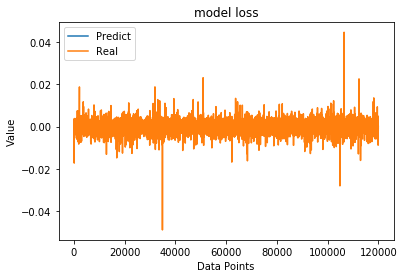

array([[0.00019559],
       [0.00019703],
       [0.00019701],
       ...,
       [0.00019777],
       [0.00019841],
       [0.00019862]], dtype=float32)

In [0]:
plt.plot(predict_stock_price)
plt.plot(ynew)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predict', 'Real'], loc='upper left')
plt.show()

predict_stock_price


In [0]:
dataset.shape

(40000, 211)

In [0]:
cols= dataset.columns
index = cols[27:205]
index

Index(['Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7',
       'Ret_8', 'Ret_9', 'Ret_10',
       ...
       'Ret_169', 'Ret_170', 'Ret_171', 'Ret_172', 'Ret_173', 'Ret_174',
       'Ret_175', 'Ret_176', 'Ret_177', 'Ret_178'],
      dtype='object', length=178)

In [0]:
returns = cols[28: 206]
returns


Index(['Ret_2', 'Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9',
       'Ret_10', 'Ret_11',
       ...
       'Ret_170', 'Ret_171', 'Ret_172', 'Ret_173', 'Ret_174', 'Ret_175',
       'Ret_176', 'Ret_177', 'Ret_178', 'Ret_179'],
      dtype='object', length=178)

In [0]:
for i in range(118):
  dataset[returns[i]] = dataset[returns[i]]+ dataset[index[i]]

In [0]:
dataset.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,...,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.59025,-0.117558,0.558392,0.405572,8.0,0.430972,75751,0.2254,11.0,4.744703,-0.572244,0.49,5.0,1.842984,27.053679,1.0,-0.549725,0.803059,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675,0.055275,-0.010770,-0.010767,-0.011501,-0.012239,-0.012246,-0.011822,-0.011385,-0.011461,-0.010816,-0.010822,-0.010816,-0.010816,-0.010972,...,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,3.59025,-0.117558,0.558392,0.405572,3.0,0.388896,17369,0.0166,13.0,4.744703,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,0.002500,0.002975,0.002976,0.002975,0.002451,0.002196,0.002188,0.002236,0.001924,0.001182,0.001173,0.000926,...,-0.000104,0.000555,0.000259,2.559339e-05,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.881545e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,3.59025,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.605593,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,0.005399,0.004997,0.005804,0.006204,0.006860,0.005683,0.006881,0.007491,0.006460,0.007107,0.006178,0.005634,...,-0.000003,-0.000102,-0.000292,5.032658e-04,-0.000126,-0.000135,0.000238,-0.000106,-0.000137,-0.000419,-0.000379,0.000013,0.000001,-0.000009,-0.000283,-0.000526,0.000247,-0.000134,0.000675,1.136847e-04,0.000234,-0.000506,-0.000007,-0.000249,0.000119,0.000277,0.000656,0.000127,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,3.59025,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.588524,1.801865,1.0,-1.131213,1.565036,-1.205438,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329675,0.000984,0.014106,0.014383,0.014295,0.014096,0.013795,0.014506,0.014074,0.013931,0.014271,0.013632,0.014052,0.014196,0.014066,...,0.000120,-0.000119,0.000285,-1.020028e-07,0.000285,-0.000350,0.000214,-0.000703,0.000153,-0.000286,0.000136,-0.000579,-0.000139,-0.000005,-0.000009,0.000010,0.000290,-0.000068,-0.000352,2.739541e-04,-0.000292,0.000446,0.000288,0.000001,0.000304,-0.000027,0.000371,-0.000055,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.00000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,0.009833,0.009835,0.008630,0.008609,0.008614,0.009237,0.007394,0.007399,0.008625,0.009838,0.007410,0.008383,...,-0.000979,0.000978,-0.0000

In [0]:
xscale = np.reshape(xscale, (xscale.shape[0], xscale.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (xscale.shape[1],1)))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.025))

regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.025))

regressor.add(Dense(units = 1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse', 'mae'])

In [0]:
regressor.fit(xscale, ynew, epochs = 5, batch_size =50 ) #optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse', 'mae']
xscale = np.reshape(xscale, (xscale.shape[0], xscale.shape[1], 1))
predict_stock_price1 = regressor.predict(xscale)

Epoch 1/5
120000/120000 [==============================] - 381s 3ms/step - loss: 1.5750e-06 - mean_squared_error: 1.5750e-06 - mean_absolute_error: 7.5137e-04
Epoch 2/5
120000/120000 [==============================] - 381s 3ms/step - loss: 1.0494e-06 - mean_squared_error: 1.0494e-06 - mean_absolute_error: 6.4836e-04
Epoch 3/5
120000/120000 [==============================] - 382s 3ms/step - loss: 1.0041e-06 - mean_squared_error: 1.0041e-06 - mean_absolute_error: 6.1749e-04
Epoch 4/5
120000/120000 [==============================] - 381s 3ms/step - loss: 9.6748e-07 - mean_squared_error: 9.6748e-07 - mean_absolute_error: 5.9213e-04
Epoch 5/5
120000/120000 [==============================] - 380s 3ms/step - loss: 9.5774e-07 - mean_squared_error: 9.5774e-07 - mean_absolute_error: 5.8582e-04


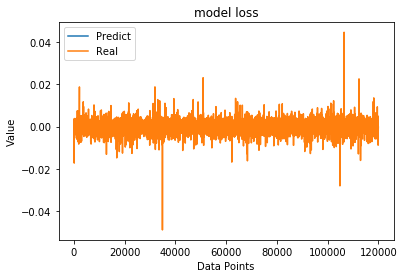

array([[-0.00018277],
       [-0.0001808 ],
       [-0.00018328],
       ...,
       [-0.00018785],
       [-0.00018224],
       [-0.00018004]], dtype=float32)

In [0]:
plt.plot(predict_stock_price1)
plt.plot(ynew)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predict', 'Real'], loc='upper left')
plt.show()

predict_stock_price1

In [0]:
#rows = zip(ynew, Ynew , predicted_stockTYJ)